<a href="https://colab.research.google.com/github/mansi-guptaa/Person-Detection-with-YOLOv8/blob/main/Person_Detection_with_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem statement

The project aims to train an object detection model to identify Person.
In essence, the problem revolves around developing a robust object detection solution for identifying Person, leveraging the capabilities of the YOLO framework and a curated dataset.

## Project Summary

**Object Detection:** The  task involves detecting specific objects

**Dataset Preparation:** Collected the dataset from online source and then annotated in labelImg

**Model Training:** The core of the problem involves training a YOLO model on the prepared dataset. The goal is to enable the model to accurately locate and classify Person in new, unseen aerial images.

**Model Evaluation and Prediction:** It includes steps to evaluate the trained model's performance and use it for making predictions on new images, as demonstrated by the code loading the best model weights and applying it to sample images.



## Steps Involved

This project involves the following steps:

**Setup:** Install necessary libraries like ultralytics.

**Data Preparation:** Annotate the dataset in LabelImg.

**Model Training:** Train a YOLOv8 model using the prepared dataset, specifying parameters like epochs, image size, and batch size.

**Evaluation:** Evaluate the trained model using provided metrics like confusion matrix.

**Prediction:** Load the best trained model weights and use it to predict objects in new images.

##Let's Begin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Jan 18 08:26:16 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()
from  ultralytics import YOLO
import os

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.1/112.6 GB disk)


In [ ]:
# Define class and their indexes
class_names = ['Persona']
class_indices = {names : index for index, names in enumerate(class_names)}

img_width, img_height = 640, 640


In [ ]:
# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')  # Use 'yolov8s.pt', 'yolov8m.pt', etc., for larger models

# Train the model
model.train(data='/content/drive/MyDrive/Person-Model/data.yaml', epochs=40, batch=16, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 165MB/s]

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Person-Model/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimi

100%|██████████| 755k/755k [00:00<00:00, 40.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 166MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Person-Model/train/labels.cache... 4407 images, 69 backgrounds, 0 corrupt: 100%|██████████| 4407/4407 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/drive/MyDrive/Person-Model/valid/labels.cache... 1071 images, 44 backgrounds, 0 corrupt: 100%|██████████| 1071/1071 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.31G      1.496      2.058      1.514         11        640: 100%|██████████| 276/276 [22:58<00:00,  4.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.90it/s]


                   all       1071       2293       0.38      0.376      0.315      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.29G      1.679      1.959      1.674         28        640: 100%|██████████| 276/276 [02:06<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.05it/s]


                   all       1071       2293      0.453      0.365      0.347      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.33G      1.724      1.962      1.717         12        640: 100%|██████████| 276/276 [02:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.04it/s]


                   all       1071       2293      0.477      0.422      0.405      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.28G      1.708      1.922       1.72         23        640: 100%|██████████| 276/276 [02:02<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.08it/s]


                   all       1071       2293      0.545      0.501      0.505      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.21G       1.65      1.837      1.673         41        640: 100%|██████████| 276/276 [02:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.08it/s]


                   all       1071       2293      0.586      0.451      0.485      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.22G      1.593      1.746      1.625         22        640: 100%|██████████| 276/276 [01:59<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.96it/s]


                   all       1071       2293       0.63      0.522      0.555      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.42G      1.561      1.677      1.594         25        640: 100%|██████████| 276/276 [02:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.04it/s]


                   all       1071       2293      0.685      0.569      0.639      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.28G      1.527      1.619      1.548         26        640: 100%|██████████| 276/276 [02:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]


                   all       1071       2293      0.625      0.586      0.603      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.27G      1.503      1.589      1.545         47        640: 100%|██████████| 276/276 [01:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.71it/s]


                   all       1071       2293      0.698      0.607      0.664      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.28G      1.469      1.538      1.528         29        640: 100%|██████████| 276/276 [01:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]


                   all       1071       2293       0.74      0.592      0.681      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.42G      1.439      1.504      1.504         21        640: 100%|██████████| 276/276 [02:02<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.11it/s]


                   all       1071       2293      0.722      0.601      0.683      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.43G      1.426      1.468      1.494         39        640: 100%|██████████| 276/276 [02:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.09it/s]


                   all       1071       2293      0.752      0.624      0.702      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.18G      1.406      1.438      1.472         36        640: 100%|██████████| 276/276 [02:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]


                   all       1071       2293      0.704      0.609      0.667      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.39G      1.394      1.395      1.463         25        640: 100%|██████████| 276/276 [02:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.97it/s]

                   all       1071       2293      0.731      0.647      0.707      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       2.3G      1.383      1.364      1.444         83        640: 100%|██████████| 276/276 [02:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.02it/s]


                   all       1071       2293      0.756      0.622      0.708      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.26G      1.362      1.344      1.434         21        640: 100%|██████████| 276/276 [02:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]

                   all       1071       2293      0.798      0.646      0.745      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       2.4G      1.338      1.301      1.418         28        640: 100%|██████████| 276/276 [02:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.05it/s]

                   all       1071       2293      0.767      0.659      0.739       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.31G      1.329      1.307      1.409         15        640: 100%|██████████| 276/276 [01:57<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:20<00:00,  1.70it/s]


                   all       1071       2293      0.763       0.64      0.731      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40       2.3G      1.316      1.276      1.405         26        640: 100%|██████████| 276/276 [02:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.07it/s]

                   all       1071       2293      0.769      0.664      0.746      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.44G      1.304      1.236      1.385         16        640: 100%|██████████| 276/276 [02:00<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.06it/s]

                   all       1071       2293      0.746      0.661      0.737      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.39G      1.273      1.223       1.38         31        640: 100%|██████████| 276/276 [02:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.06it/s]

                   all       1071       2293      0.789      0.637      0.741      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40       2.3G      1.261      1.196      1.371         27        640: 100%|██████████| 276/276 [02:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.99it/s]

                   all       1071       2293      0.775      0.664      0.754      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.24G       1.26      1.183      1.363         39        640: 100%|██████████| 276/276 [02:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.10it/s]

                   all       1071       2293      0.777      0.681      0.763      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.24G      1.241      1.158      1.343         25        640: 100%|██████████| 276/276 [02:03<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]


                   all       1071       2293       0.79      0.663      0.758      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.17G      1.226      1.147      1.336         16        640: 100%|██████████| 276/276 [02:03<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]

                   all       1071       2293      0.777      0.685      0.767      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.31G      1.224      1.131      1.336         37        640: 100%|██████████| 276/276 [01:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.78it/s]

                   all       1071       2293      0.777      0.698      0.772      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.26G      1.224      1.118      1.336         19        640: 100%|██████████| 276/276 [02:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]

                   all       1071       2293      0.764      0.721      0.782      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.37G      1.192      1.091      1.314         36        640: 100%|██████████| 276/276 [02:02<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.04it/s]

                   all       1071       2293      0.808      0.682      0.778      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.31G      1.183      1.067      1.305         32        640: 100%|██████████| 276/276 [02:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]


                   all       1071       2293      0.804      0.682      0.776      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.41G      1.177      1.058      1.298         17        640: 100%|██████████| 276/276 [02:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]


                   all       1071       2293      0.799      0.685      0.775      0.494
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.17G      1.153       0.94      1.294         17        640: 100%|██████████| 276/276 [02:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.99it/s]


                   all       1071       2293      0.795       0.68      0.774      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.19G      1.102     0.8927      1.256          9        640: 100%|██████████| 276/276 [01:58<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.07it/s]

                   all       1071       2293      0.833       0.68      0.782        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.16G      1.099     0.8745      1.253         12        640: 100%|██████████| 276/276 [01:53<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:19<00:00,  1.79it/s]

                   all       1071       2293        0.8      0.707      0.793      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.18G      1.076     0.8593      1.237         25        640: 100%|██████████| 276/276 [01:52<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.07it/s]

                   all       1071       2293      0.812      0.725      0.807      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.16G      1.069     0.8339      1.236          8        640: 100%|██████████| 276/276 [01:57<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]


                   all       1071       2293      0.826      0.712      0.805      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       2.2G      1.045     0.8112      1.213         32        640: 100%|██████████| 276/276 [01:56<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.11it/s]

                   all       1071       2293      0.819      0.717      0.807      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40       2.2G      1.035     0.8009      1.204         10        640: 100%|██████████| 276/276 [01:59<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]

                   all       1071       2293      0.813      0.717      0.801      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.17G      1.019      0.778      1.201          9        640: 100%|██████████| 276/276 [01:54<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.00it/s]

                   all       1071       2293      0.826      0.717      0.804      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.18G      1.007     0.7682      1.189         16        640: 100%|██████████| 276/276 [01:54<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:16<00:00,  2.05it/s]


                   all       1071       2293      0.827      0.713      0.803       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.18G     0.9944     0.7452      1.187          8        640: 100%|██████████| 276/276 [02:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]

                   all       1071       2293      0.841      0.708      0.809      0.525



40 epochs completed in 1.892 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:17<00:00,  1.91it/s]


                   all       1071       2293      0.841      0.709      0.809      0.525
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d1db6554bd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

/content


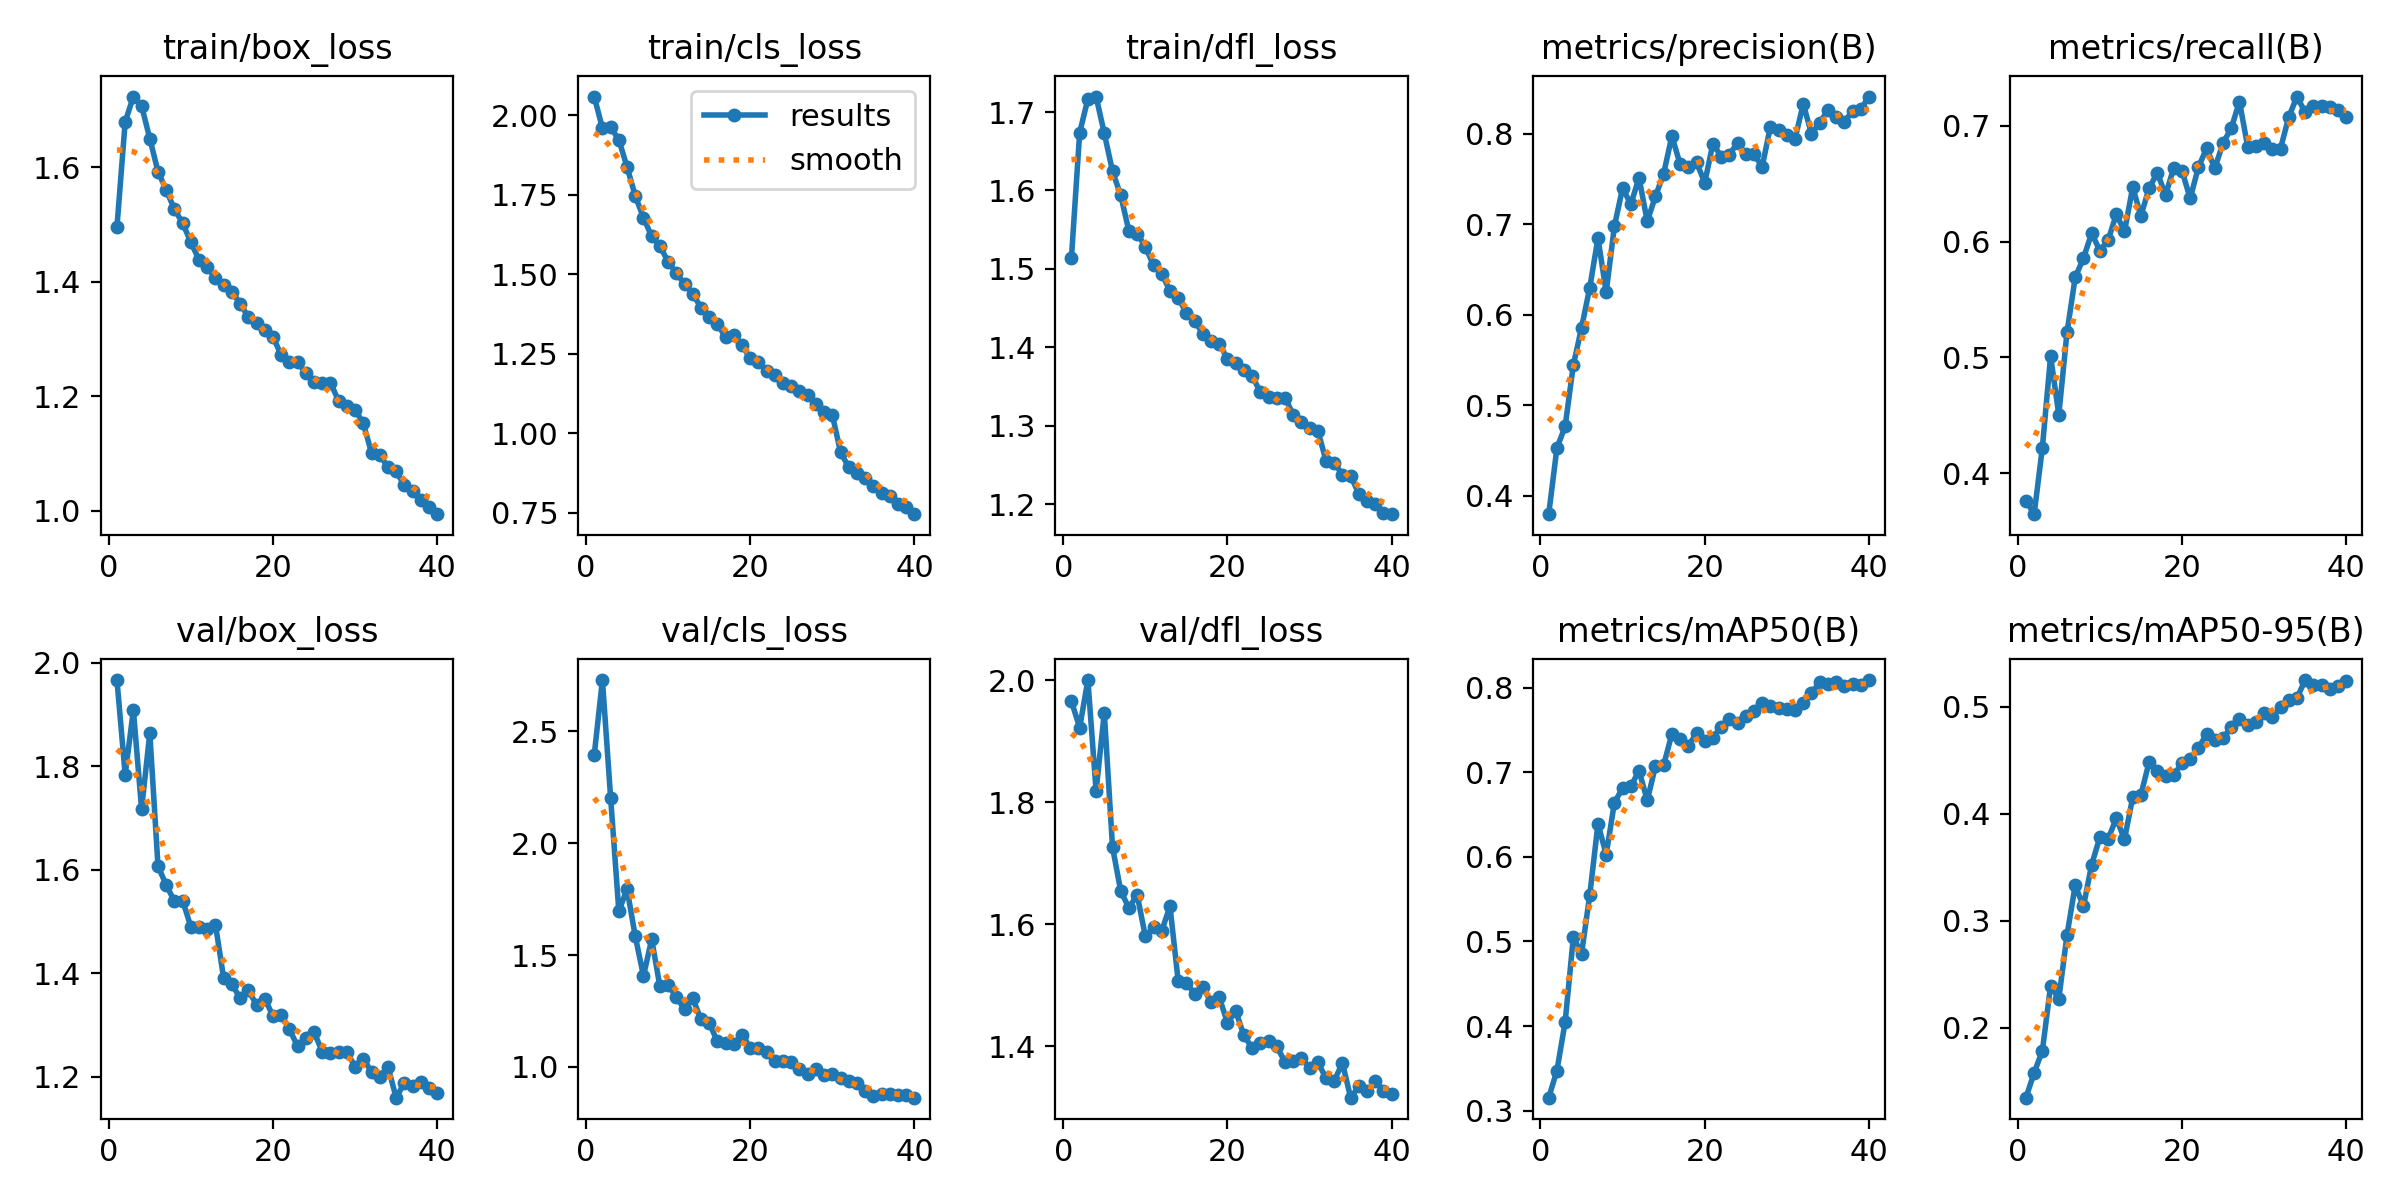

In [ ]:
%cd {HOME}
from IPython.display import Image

Image(filename = f"{HOME}/runs/detect/train/results.png",width = 1400)

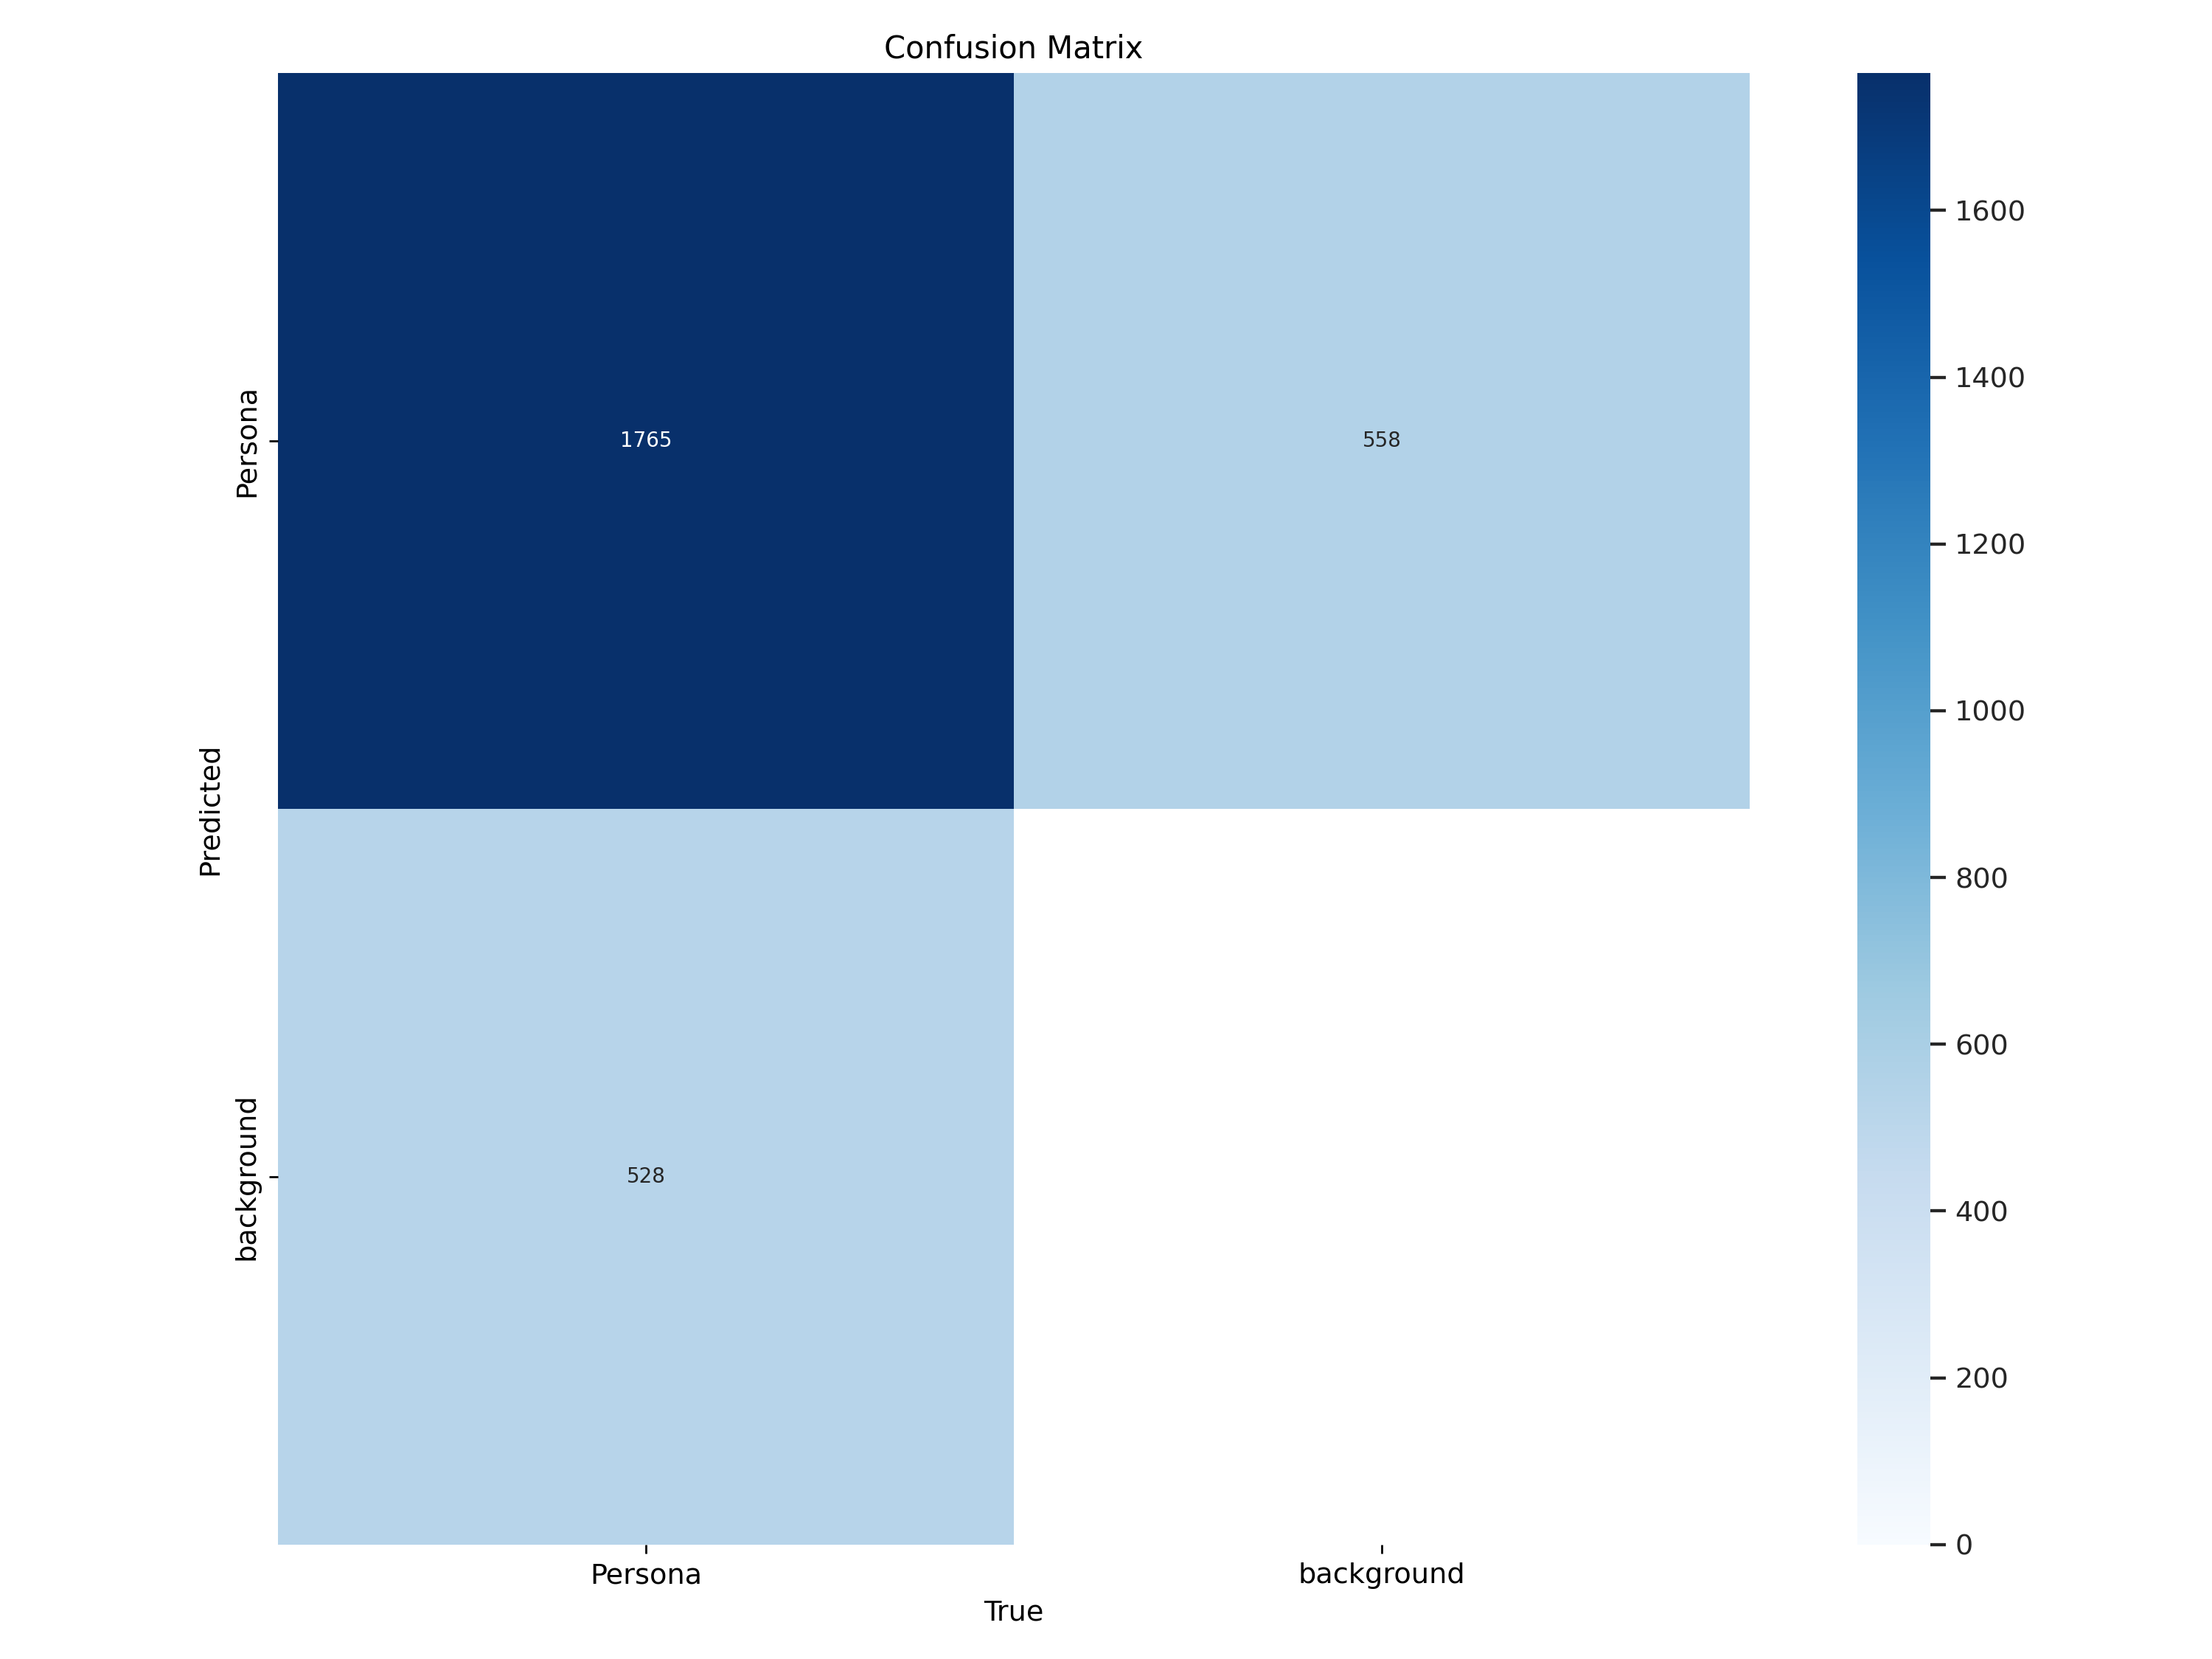

In [ ]:
Image(filename = f"{HOME}/runs/detect/train/confusion_matrix.png",width = 1000)

In [ ]:
model  = YOLO('/content/runs/detect/train/weights/best.pt')
results = model('/content/premium_photo-1661484857459-7256e961205d_jpg.rf.aa543481948b8207eea51c7f7b46471d.jpg',imgsz= 640, save = True)


image 1/1 /content/premium_photo-1661484857459-7256e961205d_jpg.rf.aa543481948b8207eea51c7f7b46471d.jpg: 640x640 1 Persona, 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


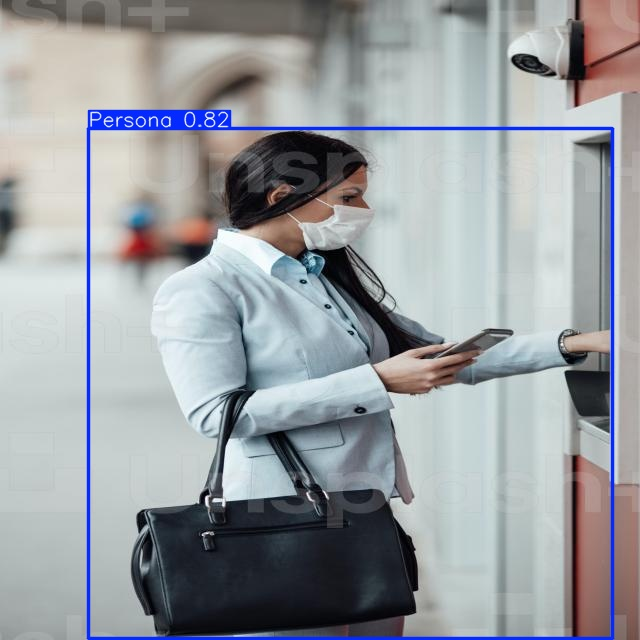

In [ ]:
Image(filename = f"{HOME}/runs/detect/predict/premium_photo-1661484857459-7256e961205d_jpg.rf.aa543481948b8207eea51c7f7b46471d.jpg",width = 640)